In [296]:
import numpy as np
import matplotlib.pyplot as plt
from control import dlqr

$$
    \begin{bmatrix}
        v_x \\
        v_y \\
        \omega_z
    \end{bmatrix} 
    =
    \frac{r}{4}
    \begin{bmatrix}
        1 & 1 & 1 & 1 \\
        -1 & 1 & 1 & -1 \\
        -\frac{1}{(l_x + l_y)} & \frac{1}{(l_x + l_y)} & -\frac{1}{(l_x + l_y)} & \frac{1}{(l_x + l_y)}
    \end{bmatrix}
    \begin{bmatrix}
        \dot{\theta}_0 \\
        \dot{\theta}_1 \\
        \dot{\theta}_2 \\
        \dot{\theta}_3
    \end{bmatrix} 
$$

In [297]:
r = 0.0325 # Wheel radius
lx = 0.0845 # Base length x
ly = 0.08 # Base length y

J = (r/4.0)*np.array([[1, 1, 1, 1],
                      [-1, 1, 1, -1],
                      [-1/(lx+ly), 1/(lx+ly), -1/(lx+ly), 1/(lx+ly)]])
J_inv = np.linalg.pinv(J)

### Open Loop

In [298]:
X = np.empty((3,0))
X_dot = np.empty((3,0))
U = np.empty((4,0))

T_s = 0.01
t_f = 10

x = np.array([1, 0.5, np.pi/4]).T
x_dot = np.array([0, 0, 0]).T
u = np.array([1, 1, 1, 1]).T

for t in np.arange(0, t_f, T_s):

    X = np.concatenate([X, x.reshape((-1,1))], axis=1)
    X_dot = np.concatenate([X_dot, x_dot.reshape((-1,1))], axis=1)

    # Rotation marix to transform robot orientation to global frame
    rot_m = np.array([[np.cos(x[2]), -np.sin(x[2]), 0],
                      [np.sin(x[2]), np.cos(x[2]), 0],
                      [0, 0, 1]])
    
    x_dot = np.dot(J, u)

    # Discrete state space
    # x[k-1] = x[k] + J*T_s*u
    x = x + T_s*np.dot(np.dot(rot_m, J), u)


x = 1.2295798941816451
y = 0.7295798941817561
w = 0.7853981633974483


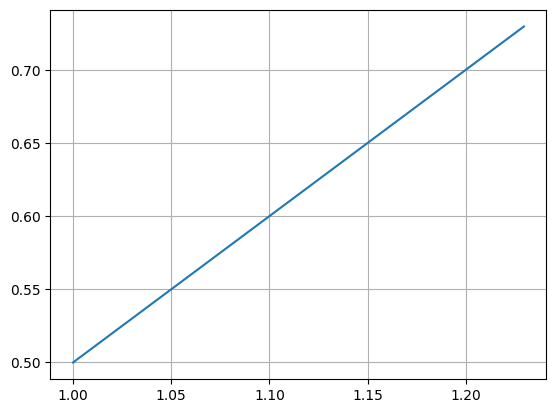

In [299]:
print("x = " + str(X[0,-1]))
print("y = " + str(X[1,-1]))
print("w = " + str(X[2,-1]))

plt.plot(X[0],X[1])
plt.grid()

### Feedback Linearization

In [300]:
X = np.empty((3,0))
U = np.empty((4,0))

T_s = 0.01
t_f = 0.5

x = np.array([0, 0, 0]).T
x_goal = np.array([1, 1, 0]).T

K = np.identity(3)

for t in np.arange(0, t_f, T_s):

    X = np.concatenate([X, x.reshape((-1,1))], axis=1)

    # x_dot = v = J*u = K*(x_goal - x)
    v = np.dot(K, (x_goal - x))

    # Rotation marix to transform robot orientation to global frame
    rot_m = np.array([[np.cos(x[2]), -np.sin(x[2]), 0],
                      [np.sin(x[2]), np.cos(x[2]), 0],
                      [0, 0, 1]])

    # Discrete state space
    # x[k-1] = x[k] + (r/4)*J*T_s*u
    x = x + (T_s/T_s)*np.dot(np.dot(np.dot(rot_m, J), np.linalg.pinv(np.dot(rot_m, J))), v)

x = 1.0
y = 1.0
w = 0.0


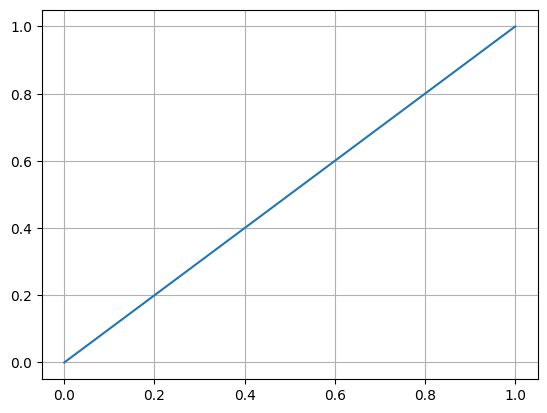

In [301]:
print("x = " + str(X[0,-1]))
print("y = " + str(X[1,-1]))
print("w = " + str(X[2,-1]))

plt.plot(X[0],X[1])
plt.grid()

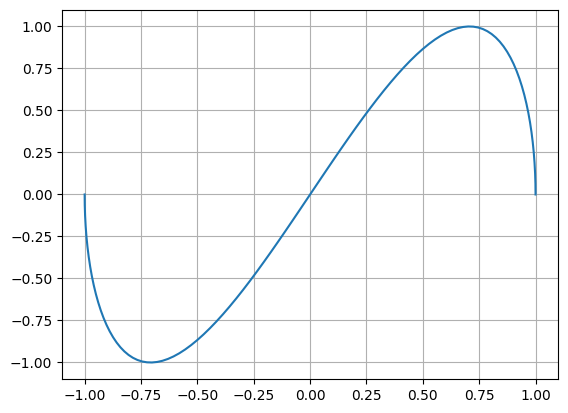

In [302]:
plt.plot(np.cos(np.linspace(0,np.pi,100)),np.sin(np.linspace(0,2*np.pi,100)))
plt.grid()

In [303]:
X = np.empty((3,0))
V = np.zeros((3,0))

T_s = 0.01
t_sim = 0

path = np.array([[0, 0, 0],
                 [1,1,np.pi/4],
                 [2,1.5,0],
                 [2.5,1.5,np.pi/2],
                 [3,3,np.pi]]).T
x = path[:,0]
x_goal = path[:,-1]

#K = np.identity(3)
R = 0.1*np.identity(3)
Q = 0.1*np.identity(3)
K, _, _ = dlqr(np.identity(3),np.identity(3),Q,R)
print("K = " + str(K))

i = 0

distance_to_goal = np.sqrt((x_goal[0] - x[0])**2 + (x_goal[1] - x[1])**2)

while distance_to_goal > 0.001:

    X = np.concatenate([X, x.reshape((-1,1))], axis=1)
    V = np.concatenate([V, v.reshape((-1,1))], axis=1)

    # x_dot = v = J*u = K*(x_goal - x)
    v = np.dot(K, (path[:,i] - x))

    # Rotation marix to transform robot orientation to global frame
    rot_m = np.array([[np.cos(x[2]), -np.sin(x[2]), 0],
                      [np.sin(x[2]), np.cos(x[2]), 0],
                      [0, 0, 1]])

    # Discrete state space
    # x[k-1] = x[k] + T_s*J*u
    x = x + (T_s/T_s)*np.dot(np.dot(np.dot(rot_m, J), np.linalg.pinv(np.dot(rot_m, J))), v)

    distance_to_waypoint = np.sqrt((path[0,i] - x[0])**2 + (path[1,i] - x[1])**2)
    if distance_to_waypoint < 0.001:
        i += 1

    t_sim += T_s
    distance_to_goal = np.sqrt((x_goal[0] - x[0])**2 + (x_goal[1] - x[1])**2)

K = [[0.61803399 0.         0.        ]
 [0.         0.61803399 0.        ]
 [0.         0.         0.61803399]]


x = 2.999406175133098
y = 2.998220637746451
w = 3.1397271002549187


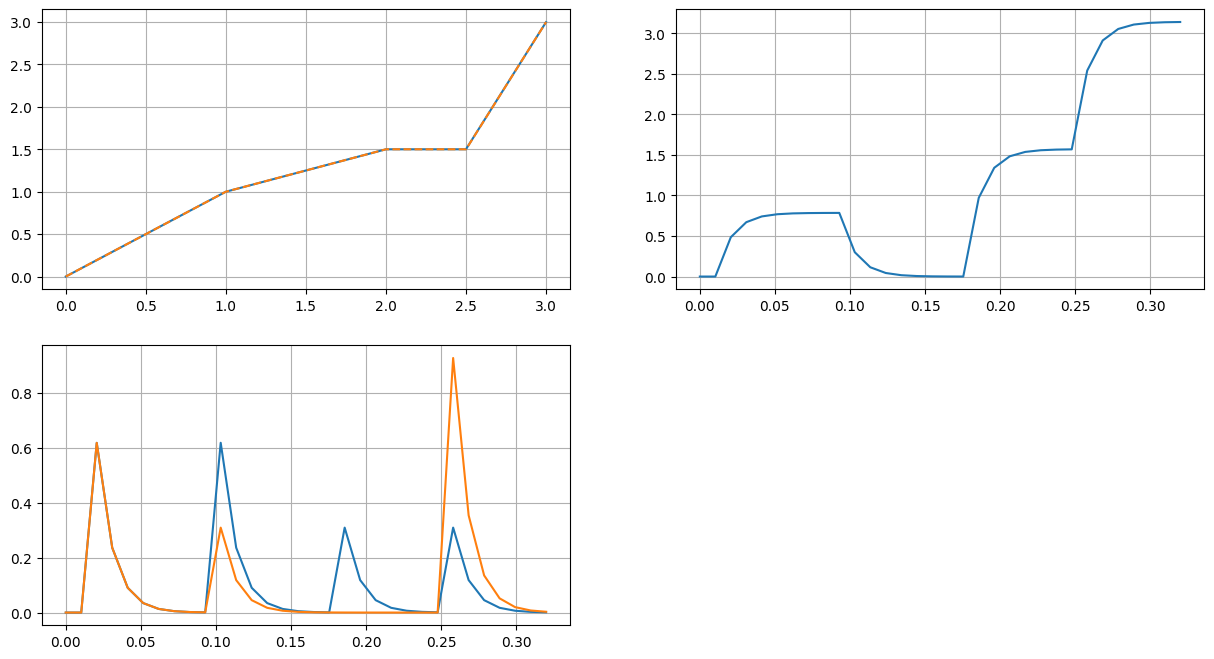

In [304]:
print("x = " + str(X[0,-1]))
print("y = " + str(X[1,-1]))
print("w = " + str(X[2,-1]))

t = np.linspace(0,t_sim,np.round(t_sim/T_s).astype(int))

plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.plot(X[0],X[1])
plt.plot(path[0,:],path[1,:],'--')
plt.grid()

plt.subplot(2,2,2)
plt.plot(t,X[2])
plt.grid()

plt.subplot(2,2,3)
plt.plot(t,V[0],t,V[1])
plt.grid()